In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
movies = pd.read_pickle('movies.pkl')

#Replace missing values with actual Python NaN.
movies = movies.replace('N/A', np.NaN)
movies = movies.replace('NA', np.NaN)
movies = movies.replace('NULL', np.NaN)

#Set the imdbRating column as float instead of strings
movies.imdbRating = movies.imdbRating.astype(float)


In [4]:
#Makes a new Data Frame without movies with script missing.
movie_scripts = movies[(movies.script.notnull())].copy()
movie_scripts.reset_index(inplace = True)
del movie_scripts['index']

In [22]:
from textblob import TextBlob, Word
def sentiment(script, pages = 100, ma = 5):
    #Creates a moving average of the sentiment polarity of the script pages (or %)
    try:
        sentiment = []
        for i in range(pages+1):
            sentiment.append(TextBlob(script[i*len(script)/pages:(i+1)*len(script)/pages]).sentiment.polarity)
        MA = []
        for i in range(len(sentiment)-ma):
            MA.append(np.mean(sentiment[i:i+ma]))
        return MA
    except:
        return [0]
movie_scripts['sentiment'] = movies.script.apply(lambda x: sentiment(x))


In [30]:
movie_scripts.sort(columns = 'imdbRating', ascending = False).head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,title,script,IMDB_info,Actors,imdbID,Awards,Country,Director,Genre,Language,...,Writer,Year,imdbRating,imdbVotes,financials,Budget,Revenue,Profits,primaryGenre,sentiment
807,Pride and Prejudice,\n\r\n\r\n\r\n\r\n\r\n ...,"{u'totalSeasons': u'1', u'Plot': u'Jane Austen...","Jennifer Ehle, Colin Firth, Susannah Harker, J...",tt0112130,0,UK,NaN,"Drama, Romance",English,...,NaN,1995,9.0,"53,965","[NULL, NULL]",NaN,NaN,NaN,Drama,"[0.0459324171767, 0.0085323450266, 0.008002669..."
819,Pulp Fiction,"\n\n\n""PULP FICTION"" -- by Quentin Tarantino &...","{u'Plot': u'The lives of two mob hit men, a bo...","Tim Roth, Amanda Plummer, Laura Lovelace, John...",tt0110912,0,USA,Quentin Tarantino,"Crime, Drama","English, Spanish, French",...,"Quentin Tarantino (story), Roger Avary (story)...",1994,8.9,"1,343,852","[8000000.0, 107930000.0]",8000000.0,107930000.0,99.930000,Crime,"[0.0951546451914, 0.0692741888422, 0.107902435..."
879,Schindler's List,\n\n\n\n<b><!--\n</b>if (window!= top)\ntop.lo...,{u'Plot': u'In German-occupied Poland during W...,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",tt0108052,0,USA,Steven Spielberg,"Biography, Drama, History","English, Hebrew, German, Polish",...,"Thomas Keneally (book), Steven Zaillian (scree...",1993,8.9,"877,500","[22000000.0, 96067179.0]",22000000.0,96067179.0,74.067179,Biography,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1047,Twin Peaks,\n\n T W I N P E A...,"{u'totalSeasons': u'2', u'Plot': u'An idiosync...","Kyle MacLachlan, Michael Ontkean, Mädchen Amic...",tt0098936,0,USA,NaN,"Crime, Drama, Mystery","English, Icelandic, Afrikaans, Norwegian",...,"Mark Frost, David Lynch",1990–1991,8.9,"112,001","[NULL, NULL]",NaN,NaN,NaN,Crime,"[-0.0234867845118, -0.0353584054834, -0.021048..."
527,Inception,\n\r\n\r\n\r\n\r\n\r\n ...,"{u'Plot': u'A thief, who steals corporate secr...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",tt1375666,0,"USA, UK",Christopher Nolan,"Action, Adventure, Sci-Fi","English, Japanese, French",...,Christopher Nolan,2010,8.8,"1,489,067","[160000000.0, 292568851.0]",160000000.0,292568851.0,132.568851,Action,"[-0.0232043787724, 0.00399606214466, 0.0191459..."


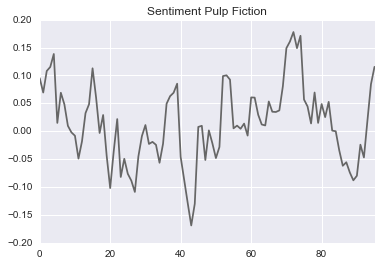

In [38]:
pd.Series(movie_scripts.sentiment[819]).plot(title = 'Sentiment Pulp Fiction', c = '0.4')

In [5]:
movie_scripts.head()


,title,script,IMDB_info,Actors,imdbID,Awards,Country,Director,Genre,Language,...,Rated,Released,Runtime,Writer,Year,imdbRating,imdbVotes,financials,Budget,Revenue
0,10 Things I Hate About You,\n\n\n\n<b><!--\n</b>if (window!= top)\ntop.lo...,"{u'Plot': u'A pretty, popular teenager can't g...","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",tt0147800,2 wins & 12 nominations.,USA,Gil Junger,"Comedy, Drama, Romance","English, French",...,PG-13,31 Mar 1999,97 min,"Karen McCullah, Kirsten Smith",1999,7.2,"225,311","[16000000.0, 38176108.0]",16000000.0,38176108.0
1,12,\n\n\n \n 12 - Script\n,{u'Plot': u'Twelve jurors must decide the fate...,"Sergey Makovetskiy, Nikita Mikhalkov, Sergey G...",tt0488478,Nominated for 1 Oscar. Another 5 wins & 5 nomi...,Russia,Nikita Mikhalkov,"Crime, Drama, Thriller","Russian, Chechen",...,PG-13,20 Sep 2007,159 min,"Nikita Mikhalkov, Aleksandr Novototskiy-Vlasov...",2007,7.8,"11,741","[4000000.0, 125024.0]",4000000.0,125024.0
2,12 and Holding,\n \n \n \n ...,{u'Plot': u'After his twin brother is accident...,"Conor Donovan, Jesse Camacho, Zoe Weizenbaum, ...",tt0417385,5 nominations.,USA,Michael Cuesta,Drama,English,...,R,07 Jul 2006,94 min,Anthony Cipriano,2005,7.6,"6,157","[400000.0, 95687.0]",400000.0,95687.0
3,12 Monkeys,\n\n\n\n<b><!--\n</b>if (window!= top)\ntop.lo...,"{u'totalSeasons': u'2', u'Plot': u'Follows the...","Aaron Stanford, Amanda Schull, Kirk Acevedo, B...",tt3148266,2 wins & 2 nominations.,USA,NaN,"Adventure, Drama, Mystery",English,...,TV-14,16 Jan 2015,42 min,"Travis Fickett, Terry Matalas",2015–,7.6,"21,688","[NULL, NULL]",NaN,NaN
4,12 Years a Slave,\n\r\n\r\n\r\n 12 ...,"{u'Plot': u'In the antebellum United States, S...","Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...",tt2024544,Won 3 Oscars. Another 234 wins & 312 nominations.,"USA, UK",Steve McQueen,"Biography, Drama, History",English,...,R,08 Nov 2013,134 min,"John Ridley (screenplay), Solomon Northup (bas...",2013,8.1,"448,530","[20000000.0, 56667870.0]",20000000.0,56667870.0


In [6]:
import ast
#Select only the movies that were found with the IMDB API
movie_scripts = movie_scripts[movie_scripts.IMDB_info.apply(lambda x: ast.literal_eval(x['Response']))]


In [20]:
def awards(award):
    try:
        if 'Oscar' in award:
            return 1
        else:
            return 0
    except:
        return 0
movie_scripts.Awards = movie_scripts.Awards.apply(lambda x: awards(x)) 


def runtime(r):
    try:
        return int(r.replace('min','')) 
    except:
        return np.NaN

movie_scripts['Runtime'] = movie_scripts.Runtime.apply(lambda x: runtime(x))

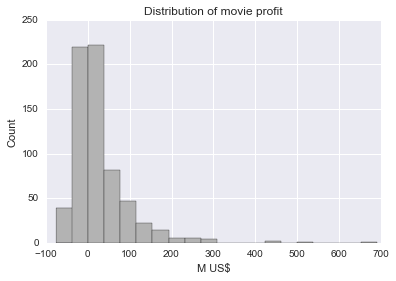

In [8]:
movie_scripts['Profits'] = (movie_scripts.Revenue - movie_scripts.Budget)/1000000
movie_scripts.Profits.hist(bins=20, color = '0.7')
plt.title('Distribution of movie profit')
plt.xlabel('M US$')
plt.ylabel('Count')

In [53]:
movie_scripts.head()

,title,script,IMDB_info,Actors,imdbID,Awards,Country,Director,Genre,Language,...,financials,Budget,Revenue,sentiment,sentiment_avg,sentiment_stdev,Profits,primaryGenre,Star,uniqueDirectors
0,10 Things I Hate About You,\n\n\n\n<b><!--\n</b>if (window!= top)\ntop.lo...,"{u'Plot': u'A pretty, popular teenager can't g...","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...",tt0147800,0,USA,Gil Junger,"Comedy, Drama, Romance","English, French",...,"[16000000.0, 38176108.0]",16000000.0,38176108.0,"[0.11383952936, 0.105862606283, 0.081115874257...",0.050608,0.060887,22.176108,Comedy,Heath Ledger,Gil Junger
2,12 and Holding,\n \n \n \n ...,{u'Plot': u'After his twin brother is accident...,"Conor Donovan, Jesse Camacho, Zoe Weizenbaum, ...",tt0417385,0,USA,Michael Cuesta,Drama,English,...,"[400000.0, 95687.0]",400000.0,95687.0,"[0.0166268533054, -0.00886338353005, -0.051273...",0.012207,0.075825,-0.304313,Drama,Conor Donovan,Michael Cuesta
3,12 Monkeys,\n\n\n\n<b><!--\n</b>if (window!= top)\ntop.lo...,"{u'totalSeasons': u'2', u'Plot': u'Follows the...","Aaron Stanford, Amanda Schull, Kirk Acevedo, B...",tt3148266,0,USA,NaN,"Adventure, Drama, Mystery",English,...,"[NULL, NULL]",NaN,NaN,"[0.0139348074864, 0.010821345948, 0.0288479275...",-0.002714,0.053064,NaN,Adventure,Aaron Stanford,NaN
4,12 Years a Slave,\n\r\n\r\n\r\n 12 ...,"{u'Plot': u'In the antebellum United States, S...","Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...",tt2024544,1,"USA, UK",Steve McQueen,"Biography, Drama, History",English,...,"[20000000.0, 56667870.0]",20000000.0,56667870.0,"[0.144452514765, 0.152337532525, 0.14795544635...",0.049629,0.064201,36.667870,Biography,Chiwetel Ejiofor,Steve McQueen
5,127 Hours,\n\r\n\r\n \r\n ...,{u'Plot': u'An adventurous mountain climber be...,"James Franco, Kate Mara, Amber Tamblyn, Sean Bott",tt1542344,1,"USA, UK",Danny Boyle,"Adventure, Biography, Drama","English, Italian",...,"[18000000.0, 18329466.0]",18000000.0,18329466.0,"[-0.00192164832522, -0.00922014348086, -0.0075...",0.052450,0.061374,0.329466,Adventure,James Franco,Danny Boyle


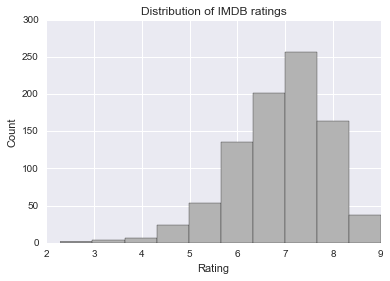

In [9]:
movie_scripts.imdbRating.hist(color ='0.7')
plt.title('Distribution of IMDB ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

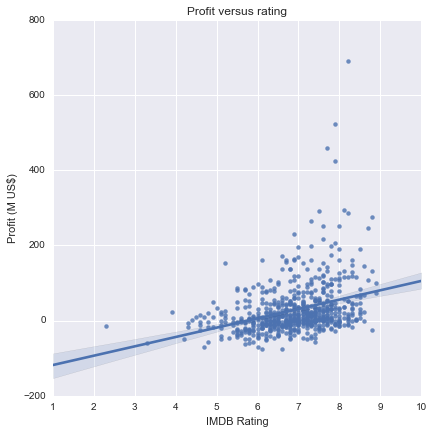

In [12]:
sns.pairplot(movie_scripts, x_vars=['imdbRating'], y_vars='Profits', size=6, aspect=1, kind='reg')
plt.title('Profit versus rating')
plt.ylabel('Profit (M US$)')
plt.xlabel('IMDB Rating')

In [14]:
movie_scripts['primaryGenre'] = movie_scripts[movie_scripts.Genre.notnull()].Genre.apply(lambda x: x.split(',')[0])
movie_scripts['primaryGenre'].unique()

array([u'Comedy', u'Crime', u'Drama', u'Adventure', u'Biography',
       u'Action', u'Short', u'Mystery', u'Documentary', u'Animation',
       u'Horror', u'Sci-Fi', u'Family', u'Game-Show', nan, u'Fantasy',
       u'Adult', u'Thriller', u'Romance'], dtype=object)

(0, 450000000.0)

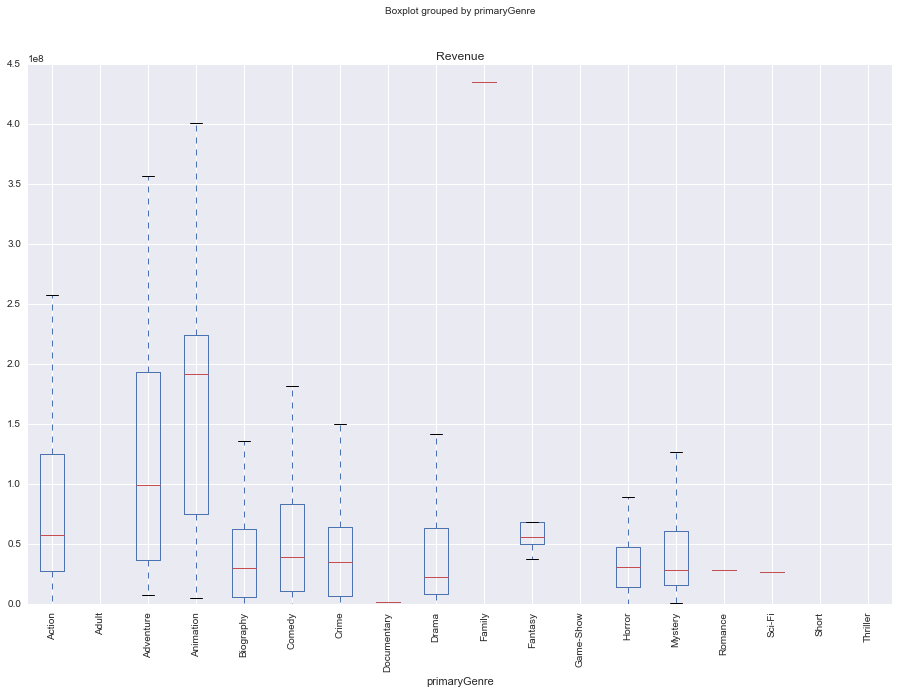

In [33]:
ax1 = movie_scripts.boxplot(column='Revenue', by='primaryGenre', rot = 90, figsize=(15,10))
ax1.set_ylim(0,0.45*1e9)


(3, 10)

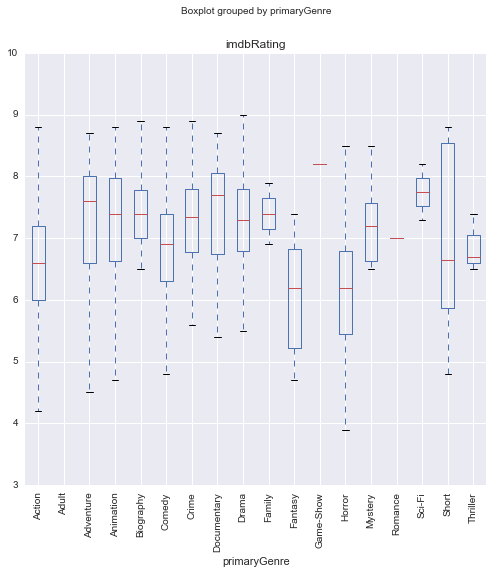

In [16]:
ax1 = movie_scripts.boxplot(column='imdbRating', by='primaryGenre', rot = 90, figsize=(8,8))
ax1.set_ylim(3,10)

In [18]:
movie_scripts['Star'] = movie_scripts[movie_scripts.Actors.notnull()].Actors.apply(lambda x: x.split(',')[0])
movie_scripts['Star'].unique()

array([u'Heath Ledger', u'Conor Donovan', u'Aaron Stanford',
       u'Chiwetel Ejiofor', u'James Franco', u'G\xe9rard Depardieu',
       u'Robert De Niro', u'Zac Efron', u'Danny Romo', u'Keir Dullea',
       u'John Cusack', u'Edward Norton', u'Jesse Eisenberg',
       u'Chadwick Boseman', u'Ray Winstone', u'Oliver Ackland',
       u'Joseph Gordon-Levitt', u'Nicolas Cage', u'Tom Cruise',
       u'Michael Stuhlbarg', u'Clint Eastwood', u'Jim Carrey',
       u'Nick Nolte', u'Olivia Schaperjohn', u'Christina Ricci',
       u'Jane Fonda', u'Harrison Ford', u'Scott Weinger', u'Will Smith',
       u'Tom Skerritt', u'Sigourney Weaver', u'James Caan', nan,
       u'Bette Davis', u'Sandra Bullock', u'Sean Penn', u'Dustin Hoffman',
       u'Billy Crudup', u'F. Murray Abraham', u'Hilary Swank',
       u'Kevin Spacey', u'Denzel Washington', u'Richard Dreyfuss',
       u'Christian Bale', u'Walter Huston', u'Colin Farrell',
       u'Jason Biggs', u'Chris Ambrose', u'Joe Belcher',
       u'Jean-Louis 

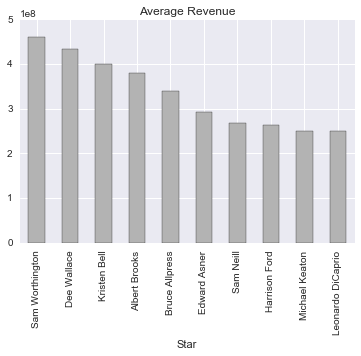

In [19]:
movie_scripts[movie_scripts.Revenue.notnull()].groupby('Star').Revenue.mean().sort_values(ascending = False).head(10).plot(kind='bar', title='Average Revenue', color = '0.7')

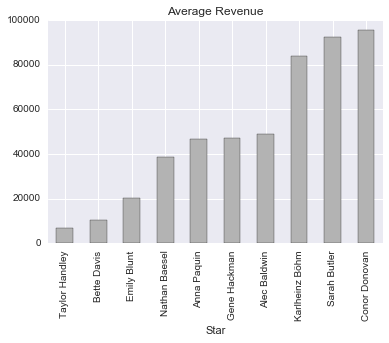

In [20]:
movie_scripts[movie_scripts.Revenue.notnull()].groupby('Star').Revenue.mean().sort_values(ascending = True).head(10).plot(kind='bar', title='Average Revenue', color = '0.7')

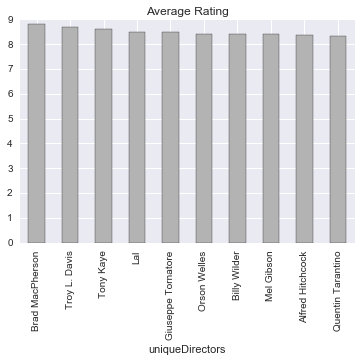

In [21]:
movie_scripts['uniqueDirectors'] = movie_scripts[movie_scripts.Director.notnull()].Director.apply(lambda x: x.split(',')[0])
movie_scripts['uniqueDirectors'].unique()
movie_scripts[movie_scripts.imdbRating.notnull()].groupby('uniqueDirectors').imdbRating.mean().sort_values(ascending = False).head(10).plot(kind='bar', title='Average Rating', color = '0.7')

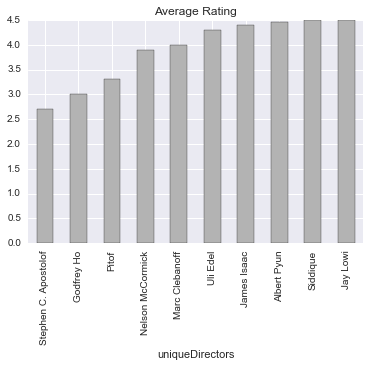

In [22]:
movie_scripts[movie_scripts.imdbRating.notnull()].groupby('uniqueDirectors').imdbRating.mean().sort_values(ascending = True).head(10).plot(kind='bar', title='Average Rating', color = '0.7')

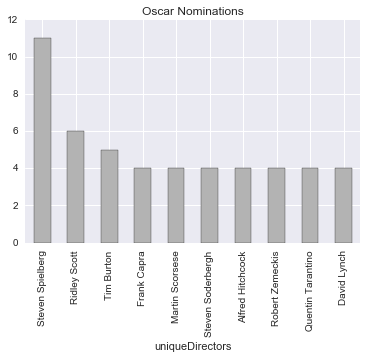

In [23]:
movie_scripts[movie_scripts.Awards.notnull()].groupby('uniqueDirectors').Awards.sum().sort_values(ascending = False).head(10).plot(kind='bar', title='Oscar Nominations', color = '0.7')

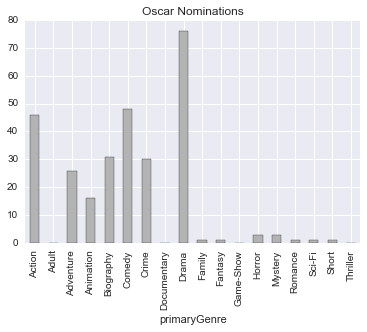

In [24]:
movie_scripts[movie_scripts.Awards.notnull()].groupby('primaryGenre').Awards.sum().plot(kind='bar', title='Oscar Nominations', color = '0.7')

In [22]:
(movie_scripts[movie_scripts.Year != '2015'].groupby(by = 'Year').Revenue/1000000.mean().plot(kind='bar')

TypeError: unsupported operand type(s) for /: 'SeriesGroupBy' and 'int'

In [20]:
movie_scripts[movie_scripts.Year == '2015']

,title,script,IMDB_info,Actors,imdbID,Awards,Country,Director,Genre,Language,...,Released,Runtime,Writer,Year,imdbRating,imdbVotes,financials,Budget,Revenue,Profits
609,Legend,\nLEGEND\nORIGINAL SCREENPLAY by WILLIAM HJORT...,{u'Plot': u'Identical twin gangsters Ronald an...,"Paul Anderson, Tom Hardy, Christopher Ecclesto...",tt3569230,0,"UK, France, USA",Brian Helgeland,"Biography, Crime, Drama",English,...,20 Nov 2015,132 min,"Brian Helgeland, John Pearson (book)",2015,7.0,"92,613","[30000000.0, 1865774.0]",30000000.0,1865774.0,-28.134226
958,Star Wars: The Force Awakens,\n\r\n\r\n \r\n ...,{u'Plot': u'Three decades after the defeat of ...,"Harrison Ford, Mark Hamill, Carrie Fisher, Ada...",tt2488496,1,USA,J.J. Abrams,"Action, Adventure, Fantasy",English,...,18 Dec 2015,138 min,"Lawrence Kasdan, J.J. Abrams, Michael Arndt, G...",2015,8.2,"585,684","[245000000.0, 936627416.0]",245000000.0,936627416.0,691.627416


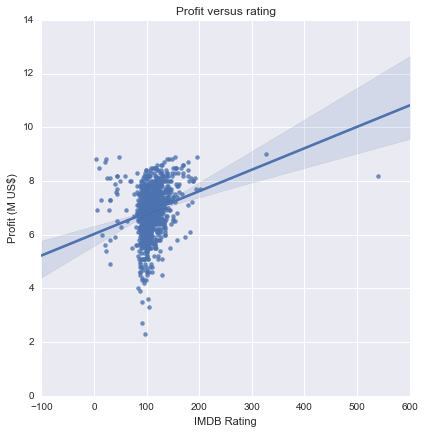

In [21]:
sns.pairplot(movie_scripts, x_vars=['Runtime'], y_vars='imdbRating', size=6, aspect=1, kind='reg')
plt.title('Profit versus rating')
plt.ylabel('Profit (M US$)')
plt.xlabel('IMDB Rating')